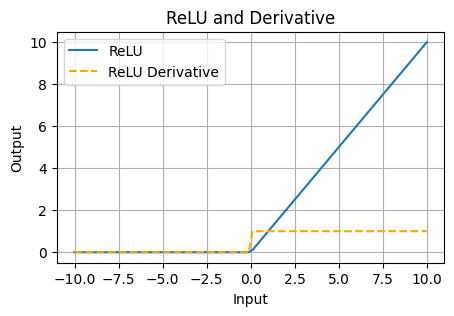

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def random_array(size, low=0, high=10):

    return np.linspace(low, high, size)

def relu(input_array):
    return np.maximum(0, input_array)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def plot_multiple_lines(x_values, y_values_list, labels=None, title=None):
    plt.figure(figsize=(5, 3))
    num_elements = len(y_values_list)
    if num_elements == 2:
        plt.plot(x_values, y_values_list[0], label=labels[0])
        plt.plot(x_values, y_values_list[1], label=labels[1], linestyle='dashed', color="orange")
    else:
        for i, y_values in enumerate(y_values_list):
            plt.plot(x_values, y_values, label=labels[i] if labels else None)
    plt.title(title)
    plt.legend()
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid(True)
    plt.show()
input_array = random_array(90, -10, 10)
relu_values = relu(input_array)
derivative_values = relu_derivative(input_array)
y_values_list = np.stack((relu_values, derivative_values))
plot_multiple_lines(input_array, y_values_list, ['ReLU', 'ReLU Derivative'], 'ReLU and Derivative')

лінійна активація гауссової похибки: 0.5 * x * (1 + tanh(sqrt(2 / pi) * (x + 0.044715 * x^3))) , якщо approximate — True чи x * P(X <= x) = 0.5 * x * (1 + erf(x / sqrt(2))) , де P(X) ~ N(0, 1) , якщо approximate — False .

Похідна достатньо складна,тому використаэмо спрощений  підхід, називається "диференціюванням назад" або "диференціюванням чисельно назад". Його сутність полягає в тому, що ми беремо дві точки, трохи відхилені від x, обчислюємо значення функції в цих точках, а потім використовуємо їх для обчислення наближеного значення похідної.
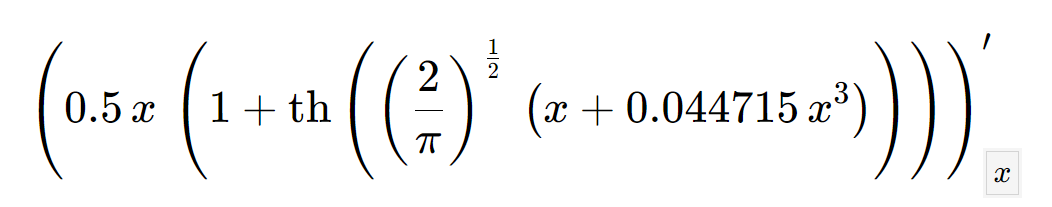

---------------------------------------------------------


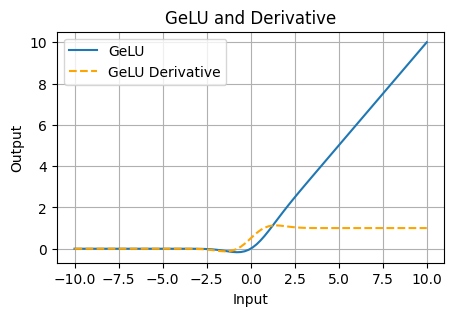

In [ ]:
def gelu(input_array):
    return 0.5 * input_array * (1 + np.tanh(np.sqrt(2 / np.pi) * (input_array + 0.044715 * input_array**3)))
def back_derivative(x,gelu, epsilon=1e-6):
    return (gelu(x + epsilon) - gelu(x - epsilon)) / (2 * epsilon)
gelu_values = gelu(input_array)
derivative_geluvalues = back_derivative(input_array,gelu)
y_values_list = np.stack((gelu_values, derivative_geluvalues))
plot_multiple_lines(input_array, y_values_list,  ['GeLU', 'GeLU Derivative'], 'GeLU and Derivative')

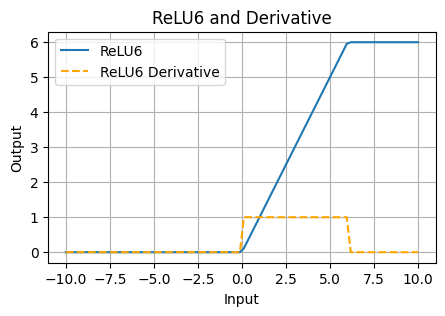

In [ ]:
def relu6(input_array):
    return np.minimum(np.maximum(0, input_array), 6)

def relu6_derivative(input_array):
    return np.where((input_array > 0) & (input_array <= 6), 1, 0)
relu6_values = relu6(input_array)
derivative_relu6values = relu6_derivative(input_array)
y_values_list = np.stack((relu6_values, derivative_relu6values))
plot_multiple_lines(input_array, y_values_list, ['ReLU6', 'ReLU6 Derivative'], 'ReLU6 and Derivative')

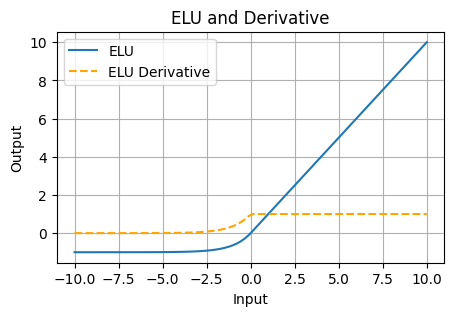

In [ ]:
def elu(input_array, alpha=1.0):
    return np.where(input_array > 0, input_array, alpha * (np.exp(input_array) - 1))

def elu_derivative(input_array, alpha=1.0):
    return np.where(input_array > 0, 1, alpha * np.exp(input_array))
elu_values = elu(input_array)
derivative_eluvalues =elu_derivative(input_array)
y_values_list = np.stack((elu_values, derivative_eluvalues))
plot_multiple_lines(input_array, y_values_list, ['ELU', 'ELU Derivative'], 'ELU and Derivative')

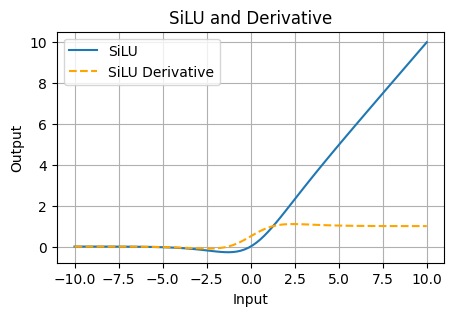

In [ ]:
def sigmoid(input_array):
    return 1 / (1 + np.exp(-input_array))

def silu(input_array):
    return input_array * sigmoid(input_array)

def silu_derivative(input_array):
    return sigmoid(input_array) * (1 + input_array * (1 - sigmoid(input_array)))
silu_values = silu(input_array)
derivative_siluvalues = silu_derivative(input_array)
y_values_list = np.stack((silu_values, derivative_siluvalues))
plot_multiple_lines(input_array, y_values_list, ['SiLU', 'SiLU Derivative'], 'SiLU and Derivative')



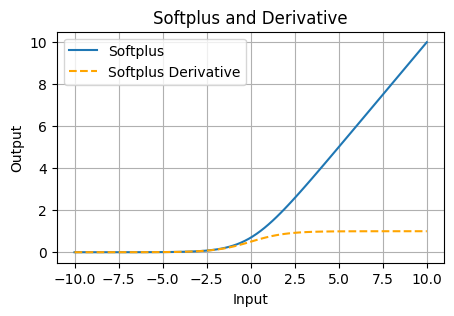

In [ ]:
def softplus(input_array):
    return np.log(1 + np.exp(input_array))

def softplus_derivative(input_array):
    return sigmoid(input_array)
softplus_values = softplus(input_array)
derivative_softplusvalues = softplus_derivative(input_array)
y_values_list = np.stack((softplus_values, derivative_softplusvalues))
plot_multiple_lines(input_array, y_values_list, ['Softplus', 'Softplus Derivative'], 'Softplus and Derivative')


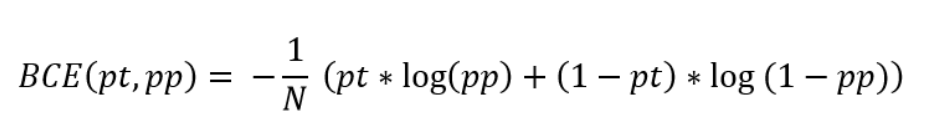

In [ ]:
predict_array = np.linspace(0.01, 1, 100)
true_array=np.ones(100)

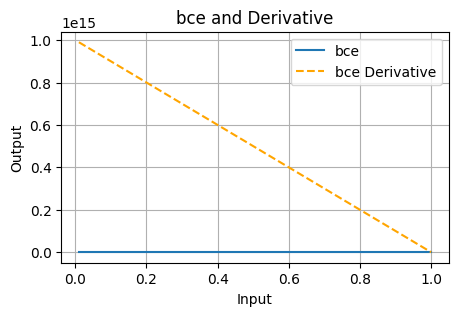

In [ ]:
def binary_cross_entropy( predict_array,true_array):
    epsilon = 1e-15
    return -(true_array * np.log(predict_array + epsilon) + (1 - true_array) * np.log(1 - predict_array + epsilon))

def binary_cross_entropy_derivative(predict_array,true_array):
    epsilon = 1e-15
    return -(true_array / (predict_array + epsilon)) + ((1 - true_array) / (1 - predict_array + epsilon))
binary_cross_entropy_values = binary_cross_entropy(true_array,predict_array)
derivative_binary_cross_entropyvalues = binary_cross_entropy_derivative(true_array,predict_array)
y_values_list = np.stack((binary_cross_entropy_values, derivative_binary_cross_entropyvalues))
plot_multiple_lines(predict_array, y_values_list, ['bce', 'bce Derivative'], 'bce and Derivative')



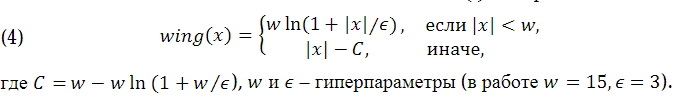

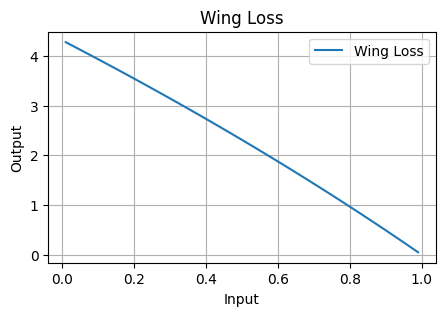

In [ ]:

def wing_loss(y_true, y_pred, w=15, epsilon=3):
    z = np.abs(y_true - y_pred)
    loss =  np.where(z < w,w * np.log(1 + z / epsilon),z - w * np.log(1 + w / epsilon))
    return loss
wing_values = wing_loss(true_array,predict_array)
plot_multiple_lines(predict_array, [wing_values], ['Wing Loss'], 'Wing Loss')

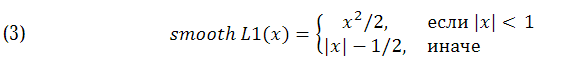

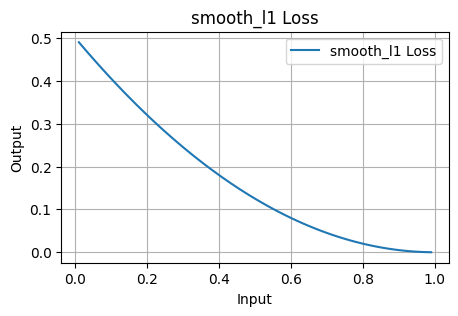

In [ ]:
def smooth_l1_loss(y_true, y_pred):
    z = np.abs(y_true - y_pred)
    loss =  np.where(z < 1,z*z/2,z -0.5)
    return loss
smooth_l1_values = smooth_l1_loss(true_array,predict_array)
plot_multiple_lines(predict_array, [smooth_l1_values], ['smooth_l1 Loss'], 'smooth_l1 Loss')

Для більш зрозумілої картини побудуємо функції втрат на проміжку (-3,3)

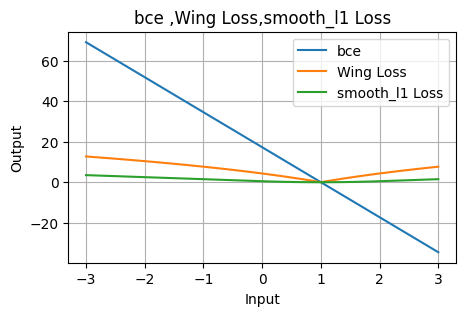

In [ ]:
predict_array1 = np.linspace(-3, 3, 100)
true_array=np.ones(100)
binary_cross_entropy_values = binary_cross_entropy(true_array,predict_array1)
wing_values = wing_loss(true_array,predict_array1)
smooth_l1_values = smooth_l1_loss(true_array,predict_array1)
y_values_list = np.stack((binary_cross_entropy_values,wing_values,smooth_l1_values))
plot_multiple_lines(predict_array1, y_values_list, ['bce','Wing Loss','smooth_l1 Loss'], 'bce ,Wing Loss,smooth_l1 Loss')